# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [46]:
# Importing necessary libraries and creating initial data file to start exploring data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Discovering what the table data looks like and how it is organized
df = pd.read_csv("Walmart.csv")
print(df.head(10).to_string())

# Discovering how many rows are in the table since I only did first 10 to view table 
print(df.shape)



   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0      1  05-02-2010    1643690.90             0        42.31       2.572  211.096358         8.106
1      1  12-02-2010    1641957.44             1        38.51       2.548  211.242170         8.106
2      1  19-02-2010    1611968.17             0        39.93       2.514  211.289143         8.106
3      1  26-02-2010    1409727.59             0        46.63       2.561  211.319643         8.106
4      1  05-03-2010    1554806.68             0        46.50       2.625  211.350143         8.106
5      1  12-03-2010    1439541.59             0        57.79       2.667  211.380643         8.106
6      1  19-03-2010    1472515.79             0        54.58       2.720  211.215635         8.106
7      1  26-03-2010    1404429.92             0        51.45       2.732  211.018042         8.106
8      1  02-04-2010    1594968.28             0        62.27       2.719  210.820450         7.808


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [51]:
# Discovering all the columns in the table
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [10]:
# Discovering if there are any null values in any of the columns
# The data is very clean, nothing is missing
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [23]:
# Getting information on the data type of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [13]:
# Seeing if there is any duplicate entries
# Looks like there are not any duplicates
print(df.duplicated().sum())

0
(6435, 8)


In [21]:
# How many records are there for each store number.
# All the stores have the same total of entries
print(df.value_counts("Store"))

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64


AttributeError: 'NoneType' object has no attribute 'to_string'

In [26]:
# Wanting to see total unique values for the other columns 
print(df.nunique())

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64


In [49]:
# Exploring summary statistics 
print(df.describe().to_string())


             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price          CPI  Unemployment
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000  6435.000000   6435.000000
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   171.578394      7.999151
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020    39.356712      1.875885
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   126.064000      3.879000
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   131.735000      6.891000
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   182.616521      7.874000
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   212.743293      8.622000
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   227.232807     14.313000


In [62]:
# Clearer reading of the summary statistics for the column weekly_sales for me
print(round(df.Weekly_Sales.mean(), 2))
print(round(df.Weekly_Sales.min(), 2))
print(round(df.Weekly_Sales.max(), 2))

1046964.88
209986.25
3818686.45


In [63]:
# figuring out the earliest and latest year the data records

df.groupby('Date').head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
710,5,28-09-2012,310141.68,0,78.33,3.666,223.574102,5.603
711,5,05-10-2012,343048.29,0,71.17,3.617,223.774444,5.422
712,5,12-10-2012,325345.41,0,66.24,3.601,223.974787,5.422
713,5,19-10-2012,313358.15,0,69.17,3.594,224.019287,5.422


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

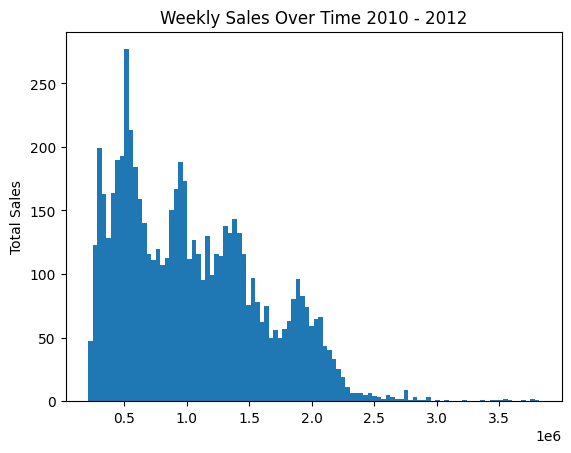

In [68]:
# Seeing where does majority of Weekly_Sales skew towards
# Also previewing for data manipulation

plt.hist(df['Weekly_Sales'], bins=100)
plt.title("Weekly Sales Over Time 2010 - 2012")
plt.ylabel("Total Sales")
plt.show()

Text(0, 0.5, 'CPI')

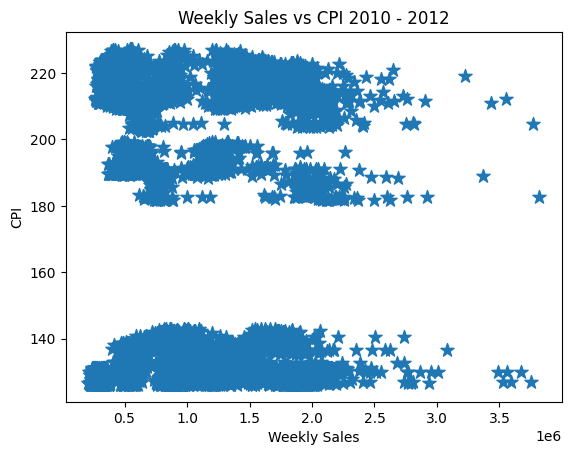

In [77]:
# Exploring the relationship between Weekly Sales and CPI 
# Relationship seems to be very neautral, data looks to be distributed equally
# Majority of relationship data sits in 0-140, 180-220 for CPI and mainly sits in brackets below 2.5 for weekly sales
plt.scatter(data=df, x="Weekly_Sales", y="CPI", marker="*", s=100)
plt.title("Weekly Sales vs CPI 2010 - 2012")
plt.xlabel("Weekly Sales")
plt.ylabel("CPI")

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Store'),
  Text(2, 0, 'Weekly_Sales'),
  Text(3, 0, 'Holiday_Flag'),
  Text(4, 0, 'Temperature'),
  Text(5, 0, 'Fuel_Price'),
  Text(6, 0, 'CPI'),
  Text(7, 0, 'Unemployment')])

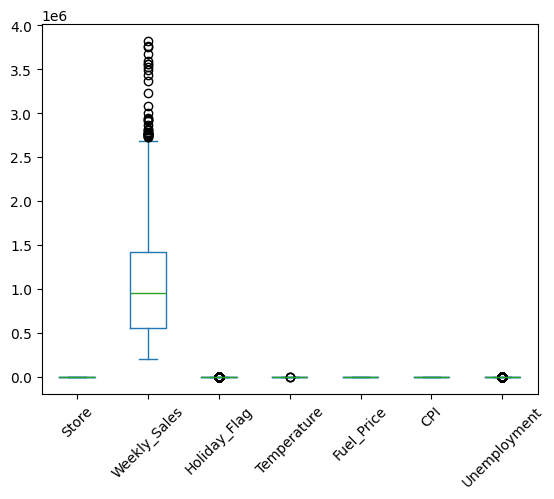

In [82]:
# Discover standard deviation of all columns
df.plot.box()
plt.xticks(rotation=45)

Text(0, 0.5, 'CPI')

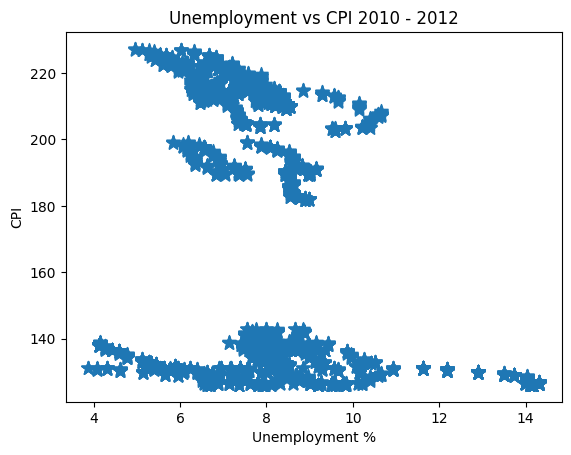

In [89]:
# Exploring if there is a relationship between CPI and Unemployment
# Looks like majority of data is below 145 and between 180-220 for CPI
# Unemployment data is majority between 6-11 %
plt.scatter(data=df, x="Unemployment", y="CPI", marker="*", s=100)
plt.title("Unemployment vs CPI 2010 - 2012")
plt.xlabel("Unemployment %")
plt.ylabel("CPI")

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

In [ ]:
# 1. I was surprised to see that the highest unemployment rate was 14% and lowest was 4% rounded. For Walmart to be the retail giant it is, I was expecting higher
# summary statistics for Weekly Sales. I am infering it depends on the store locations for that reason.

# 2. My only concern is how clean the data is. There are not any dirty data to be fixed, which is a great thing in the real world.

# 3. I am considering dropping the fuel price column and temperature column. I do not believe they hold a 
# much of impact on the data needed to answer my business issue.